In [27]:
from tones.mixer import Mixer   
from tones import SINE_WAVE

mixer = Mixer(sample_rate=44100, amplitude=1)

mixer.create_track("track1", SINE_WAVE)
mixer.create_track("track2", SINE_WAVE)

TONE1 = 500  # Hz
TONE2 = 1000 # Hz

# mixer.add_tone("track1", TONE1, duration=3)
# mixer.add_tone("track2", TONE2, endfrequency=TONE1, duration=3)
for diff in range(0, TONE2 - TONE1 + 10, 10):
    print(f"Time: {.5 * diff/10:.2f}, Tone 1: {TONE1}, Tone 2: {TONE2 - diff}")
    mixer.add_tone("track1", frequency=TONE1, duration=.5)
    mixer.add_tone("track2", frequency=TONE2 - diff, duration=.5)

mixer.write_wav("mic-sensitivity-test.wav")

Time: 0.00, Tone 1: 500, Tone 2: 1000
Time: 0.50, Tone 1: 500, Tone 2: 990
Time: 1.00, Tone 1: 500, Tone 2: 980
Time: 1.50, Tone 1: 500, Tone 2: 970
Time: 2.00, Tone 1: 500, Tone 2: 960
Time: 2.50, Tone 1: 500, Tone 2: 950
Time: 3.00, Tone 1: 500, Tone 2: 940
Time: 3.50, Tone 1: 500, Tone 2: 930
Time: 4.00, Tone 1: 500, Tone 2: 920
Time: 4.50, Tone 1: 500, Tone 2: 910
Time: 5.00, Tone 1: 500, Tone 2: 900
Time: 5.50, Tone 1: 500, Tone 2: 890
Time: 6.00, Tone 1: 500, Tone 2: 880
Time: 6.50, Tone 1: 500, Tone 2: 870
Time: 7.00, Tone 1: 500, Tone 2: 860
Time: 7.50, Tone 1: 500, Tone 2: 850
Time: 8.00, Tone 1: 500, Tone 2: 840
Time: 8.50, Tone 1: 500, Tone 2: 830
Time: 9.00, Tone 1: 500, Tone 2: 820
Time: 9.50, Tone 1: 500, Tone 2: 810
Time: 10.00, Tone 1: 500, Tone 2: 800
Time: 10.50, Tone 1: 500, Tone 2: 790
Time: 11.00, Tone 1: 500, Tone 2: 780
Time: 11.50, Tone 1: 500, Tone 2: 770
Time: 12.00, Tone 1: 500, Tone 2: 760
Time: 12.50, Tone 1: 500, Tone 2: 750
Time: 13.00, Tone 1: 500, Tone 

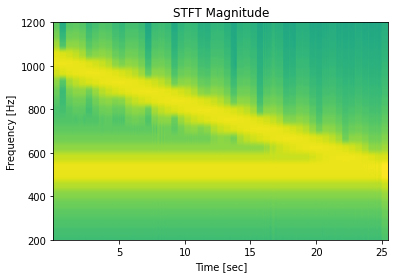

In [28]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Seems to be a good number to balance frequency precision with time precision.
SAMPLES_PER_WINDOW = 1024

def visualize(wav_path: str):
    # Parse the sound data from the given .wav file
    sample_rate, audio_samples = wavfile.read(wav_path)
    # Show off a spectrogram of the detected audio
    plt.specgram(audio_samples,
        Fs=sample_rate, 
        NFFT=SAMPLES_PER_WINDOW, 
        noverlap=SAMPLES_PER_WINDOW // 4 * 3)  # 3/4 of the window size
    plt.ylim(200, 1200)
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

visualize('mic-sensitivity-test.wav')

In [31]:

import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

# Parse the audio sample into its spectrogram
SAMPLES_PER_WINDOW = 1024  # Seems to be a good number to balance frequency precision with time precision.
sample_rate, audio_samples = wavfile.read("mic-sensitivity-test.wav")
freq, time, Zxx = signal.stft(audio_samples,
                                fs=sample_rate,
                                nperseg=SAMPLES_PER_WINDOW,
                                noverlap=(SAMPLES_PER_WINDOW // 4) * 3)
spectrogram = np.abs(Zxx).transpose()

# Generate the plots
for time_idx in range(0, len(time), 10):
    plt.plot(freq, spectrogram[time_idx])
    plt.axis([TONE1 - 250, TONE2 + 250, 0, np.amax(spectrogram)])
    # plt.title(f"Frequencies at {time[time_idx]:.2f} seconds")
    current_time = math.floor(time[time_idx]*10)/10
    plt.title(f"Time: {current_time}, Tone 1: {TONE1}, Tone 2: {TONE2 - 20*(current_time)}")
    plt.ylabel("Strength")
    plt.xlabel("Frequency [Hz]")
    plt.savefig(f"./plt/{time[time_idx]:.2f}.png")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
from playsound import playsound
playsound('mic-sensitivity-test.wav')